In [60]:
import pandas as pd
print(pd.__version__)
print(pd.__name__)

import numpy as np #импорт библиотеки для мат. вычислений

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')


print(sns.__version__)

import plotly
import plotly.express as px
print(plotly.__version__)

import plotly.graph_objs as go
from plotly.subplots import make_subplots

import dtale
import sweetviz as sv
from pandas_profiling import ProfileReport



import statistics as st
from scipy import stats # библиотека для расчетов
from sklearn.metrics import matthews_corrcoef

import category_encoders as ce

# для нормализации, стандартизации
from sklearn import preprocessing





1.4.3
pandas
0.11.2
5.10.0


EDA 3 2. Создание признаков

In [25]:
wine_data = pd.read_csv('data/wine_cleared.csv')

display(wine_data.head())
display(wine_data.tail())
wine_data = wine_data.drop(['Unnamed: 0'], axis=1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.0,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [26]:
display(wine_data.shape[0])
display(wine_data.info())
display(wine_data.columns)

129971

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


None

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')

In [27]:
wine_data['price_round'] = wine_data['price'].round().astype(int)

In [28]:
display(wine_data.head())

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65


In [29]:
def find_year(strYear):
    title, winery, designation = strYear.split('|') 
    #print(designation)
    if winery:
        result = title.replace(winery, '')    
    if designation:
        result = result.replace(designation, '')
    return result
    
wine_data['year_corrected'] = wine_data['title'] + '|' +  wine_data['winery'] + '|' + wine_data['designation']
wine_data['year_corrected'] = wine_data['year_corrected'].apply(find_year) 

#display(wine_data.iloc[339])
#display(wine_data.loc[wine_data['title'].isin(['Rainstorm 2013 Pinot Gris (Willamette Valley)'])])
#display(wine_data.loc[wine_data['title'].str.startswith("Rainstorm")])

In [30]:
display(wine_data.iloc[339])

country                                                              Spain
description              Red in color, with berry and apple aromas, thi...
designation                                                    1887 Rosado
points                                                                  82
price                                                                 13.0
province                                                         Catalonia
region_1                                                              Cava
taster_name                                              Michael Schachner
taster_twitter_handle                                          @wineschach
title                           Cavas Hill NV 1887 Rosado Sparkling (Cava)
variety                                                    Sparkling Blend
winery                                                          Cavas Hill
price_round                                                             13
year_corrected           

In [31]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
wine_data['year'] = wine_data['title'].str.findall(regex).str.get(0)

values = {
    'year': wine_data['year'].mode()[0]
}
wine_data = wine_data.fillna(value=values) 

wine_data['year_corrected'] = wine_data['year_corrected'].str.findall(regex).str.get(0)
values = {
    'year_corrected': wine_data['year_corrected'].mode()[0]
}
wine_data = wine_data.fillna(value=values) 


display(wine_data.head())
display(wine_data.info())

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year_corrected,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,2012


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
 12  price_round            129971 non-null  int32  
 13  year_corrected         129971 non-null  object 
 14  year                   129971 non-nu

None

In [32]:
#wine_data['year'] = pd.to_datetime(wine_data['year'], format='%Y')
wine_data['year'] = wine_data['year'].astype('int32')
wine_data['year_corrected'] = wine_data['year_corrected'].astype('int32')

display(wine_data.info())
display(wine_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129970 non-null  object 
 11  winery                 129971 non-null  object 
 12  price_round            129971 non-null  int32  
 13  year_corrected         129971 non-null  int32  
 14  year                   129971 non-nu

None

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year_corrected,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,2012


In [33]:
wine_data['year_date'] = pd.to_datetime(wine_data['year'], format="%Y", errors='coerce')

display(wine_data.info())
display(wine_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129908 non-null  object        
 1   description            129971 non-null  object        
 2   designation            129971 non-null  object        
 3   points                 129971 non-null  int64         
 4   price                  129971 non-null  float64       
 5   province               129908 non-null  object        
 6   region_1               129971 non-null  object        
 7   taster_name            129971 non-null  object        
 8   taster_twitter_handle  129971 non-null  object        
 9   title                  129971 non-null  object        
 10  variety                129970 non-null  object        
 11  winery                 129971 non-null  object        
 12  price_round            129971 non-null  int3

None

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year_corrected,year,year_date
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,2013,2013-01-01
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,2011,2011-01-01
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,2013,2013-01-01
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,2013,2013-01-01
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,2012,2012-01-01


In [34]:
display(wine_data[wine_data['year'] < 1950])

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year_corrected,year,year_date
339,Spain,"Red in color, with berry and apple aromas, thi...",1887 Rosado,82,13.000000,Catalonia,Cava,Michael Schachner,@wineschach,Cavas Hill NV 1887 Rosado Sparkling (Cava),Sparkling Blend,Cavas Hill,13,2013,1887,1887-01-01
1012,Italy,This ruby-hued blend of Nerello Mascalese and ...,Pietralava,88,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Antichi Vinai 1877 2013 Pietralava Red (Etna),Red Blend,Antichi Vinai 1877,35,2013,1877,1877-01-01
2135,Spain,Clover and apple aromas are basic but fresh. T...,Reserva Cuvée Barcelona 1872,85,35.363389,Catalonia,Cava,Michael Schachner,@wineschach,Codorníu NV Reserva Cuvée Barcelona 1872 Spark...,Sparkling Blend,Codorníu,35,2013,1872,1872-01-01
2262,Italy,One of Italy's most interesting and least-know...,Canua,87,40.000000,Lombardy,Valtellina Superiore,unknown,unknown,Salis 1637 2002 Canua (Valtellina Superiore),Nebbiolo,Salis 1637,40,2002,1637,NaT
2634,Italy,"Merlot (70%), Cabernet Sauvignon and Petit Ver...",Ruit Hora,90,35.363389,Tuscany,Bolgheri,unknown,unknown,Caccia al Piano 1868 2009 Ruit Hora (Bolgheri),Red Blend,Caccia al Piano 1868,35,2009,1868,1868-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127114,Argentina,Rather bland and done up with butterscotch and...,unknown,83,20.000000,Mendoza Province,Tupungato,Michael Schachner,@wineschach,Ikal 1150 2007 Chardonnay (Tupungato),Chardonnay,Ikal 1150,20,2007,1150,NaT
128565,US,Yellow cherry and blossom notes soften the bra...,Dry,87,17.000000,New York,Finger Lakes,Anna Lee C. Iijima,unknown,Hazlitt 1852 Vineyards 2013 Dry Riesling (Fing...,Riesling,Hazlitt 1852 Vineyards,17,2013,1852,1852-01-01
128817,Italy,This simple sparkler from Campania opens with ...,Pas Dosé,85,30.000000,Southern Italy,Fiano di Avellino,Kerin O’Keefe,@kerinokeefe,Tenuta Sarno 1860 2015 Pas Dosé (Fiano di Ave...,Fiano,Tenuta Sarno 1860,30,2015,1860,1860-01-01
129081,Italy,"This wine opens with forest fruit, chopped her...",Agoghè,87,18.000000,Tuscany,Toscana,unknown,unknown,Donna Olimpia 1898 2011 Agoghè Rosato (Toscana),Rosato,Donna Olimpia 1898,18,2011,1898,1898-01-01


In [35]:
display(wine_data['country'].unique())
display(wine_data['country'].value_counts())

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [36]:
wine_data['is_usa'] = wine_data['country'].apply(lambda x: 1 if x == 'US' else 0)
wine_data['is_fr'] = wine_data['country'].apply(lambda x: 1 if x == 'France' else 0)
wine_data['is_it'] = wine_data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [37]:
print(wine_data['is_fr'].sum())
print(wine_data['is_it'].sum())

22093
19540


In [38]:
wine_data['old_wine'] = wine_data['year'].apply(lambda x: 1 if x < 2010 else 0)
wine_data['old_wine'].sum()

39781

In [39]:
import re

regex1 = '\((?:[^)]*)\){1,}'
regex2 = '\([^)]*(?:\)){1,}'
str1 = re.findall(regex1, 'Rainstorm 2013 Pinot Gris (Willamette Valley) test')[-1]
str2 = re.findall(regex1, 'Nicosia 2013 Vulkà Bianco (Etna)')[-1]
str3 = re.findall(regex1, 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))')[-1]
str4 = re.findall(regex1, 'Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel)')[-1]
print(re.findall(regex2, str1)[-1])
print(re.findall(regex2, str2)[-1])
print(re.findall(regex2, str3)[-1])
print(re.findall(regex2, str4)[-1])

regex = '^.*\((.*[\(]*[\w,\s]+[\)]*)\).*$' # регулярное выражение для нахождения locality
str1 = 'Rainstorm 2013 Pinot Gris (Willamette Valley) test' 
str2 = 'Nicosia 2013 Vulkà Bianco (Etna)'
str3 = 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'
print(re.findall(regex, str1))
print(re.findall(regex, str2))
print(re.findall(regex, str3))

regex = '\((.*\([\w+,\s]+\).*)\)|\(([\w+,\s]+)\)'
str1 = 'Rainstorm 2013 Pinot Gris (Willamette Valley) test' 
str2 = 'Nicosia 2013 Vulkà Bianco (Etna)'
str3 = 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'
result = lambda x: re.findall(regex, x)[0][0] if re.findall(regex, x)[0][0] else re.findall(regex, x)[0][1]
print(result(str1))
print(result(str2))
print(result(str3))


(Willamette Valley)
(Etna)
(Columbia Valley (WA))
(Mosel)
['Willamette Valley']
['Etna']
['WA)']
Willamette Valley
Etna
Columbia Valley (WA)


In [40]:
#regex = '^.*\((.*[\(]?[\w,\s]+\s+[\)]?.*)\).*$' # регулярное выражение для нахождения locality
#wine_data['locality'] = wine_data['title'].str.findall(regex).str.get(0)

regex1 = '\((?:[^)]*\)){1,}'
wine_data['locality'] = wine_data['title'].str.findall(regex1).str.get(0).str[1:-1]

#regex = '\((.*\([\w+,\s]+\).*)\)|\(([\w+,\s]+)\)'
#wine_data['locality0'] = wine_data['title'].str.findall(regex).str.get(0).str.get(0)
#wine_data['locality1'] = wine_data['title'].str.findall(regex).str.get(0).str.get(1)
#wine_data['locality'] = wine_data['locality0'] + wine_data['locality1']
#wine_data = wine_data.drop(['locality0', 'locality1'], axis=1)

print(wine_data[wine_data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'])

display(wine_data.head())

   country                                        description  \
94      US  Barrel notes are prominent, with aromas of Cre...   

                                designation  points  price    province  \
94  Grand Klasse Reserve Lawrence Vineyards      88   22.0  Washington   

                region_1       taster_name taster_twitter_handle  \
94  Columbia Valley (WA)  Sean P. Sullivan         @wawinereport   

                                                title  ... winery price_round  \
94  Gård 2014 Grand Klasse Reserve Lawrence Vineya...  ...   Gård          22   

    year_corrected  year  year_date is_usa  is_fr  is_it  old_wine  \
94            2014  2014 2014-01-01      1      0      0         0   

                locality  
94  Columbia Valley (WA)  

[1 rows x 21 columns]


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,winery,price_round,year_corrected,year,year_date,is_usa,is_fr,is_it,old_wine,locality
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,Nicosia,35,2013,2013,2013-01-01,0,0,1,0,Etna
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,Quinta dos Avidagos,15,2011,2011,2011-01-01,0,0,0,0,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,Rainstorm,14,2013,2013,2013-01-01,1,0,0,0,Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,St. Julian,13,2013,2013,2013-01-01,1,0,0,0,Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,Sweet Cheeks,65,2012,2012,2012-01-01,1,0,0,0,Willamette Valley


EDA3 3. Создание признаков. Внешние источники данных

In [41]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [42]:
print(country_population[country_population['country'] == 'Italy'])

   country  population
24   Italy  59,097,904


In [43]:
wine_data = wine_data.join(
    country_population.set_index('country'),
    on='country'
)
display(wine_data)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,price_round,year_corrected,year,year_date,is_usa,is_fr,is_it,old_wine,locality,population
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,35,2013,2013,2013-01-01,0,0,1,0,Etna,"59,097,904"
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,15,2011,2011,2011-01-01,0,0,0,0,Douro,"10,347,892"
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,14,2013,2013,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386"
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,13,2013,2013,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386"
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,65,2012,2012,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,28,2013,2013,2013-01-01,0,0,0,0,Erben Müller-Burggraef) 2013 Brauneberger Juff...,"83,129,285"
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,75,2004,2004,2004-01-01,1,0,0,1,Oregon,"333,022,386"
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,30,2013,2013,2013-01-01,0,1,0,0,Alsace,"68,035,000"
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,32,2012,2012,2012-01-01,0,1,0,0,Alsace,"68,035,000"


In [44]:
country_area = pd.read_csv('data/country_area.csv', sep=';')

country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [45]:
wine_data = wine_data.join(
    country_area.set_index('country'),
    on='country'
)
display(wine_data)

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,year_corrected,year,year_date,is_usa,is_fr,is_it,old_wine,locality,population,area
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,2013,2013,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,2011,2011,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,2013,2013,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,2013,2013,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,2012,2012,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,2013,2013,2013-01-01,0,0,0,0,Erben Müller-Burggraef) 2013 Brauneberger Juff...,"83,129,285",357022.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,2004,2004,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,2013,2013,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,2012,2012,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0


EDA3 4. Создание признаков. Работа с форматом «дата-время»

In [46]:
wine_data['years_diff'] = ( pd.to_datetime("2022-01-12", format="%Y-%m-%d", errors='coerce') - pd.to_datetime(wine_data['year'], format="%Y", errors='coerce')).dt.days

display(wine_data['years_diff'].max())

98627.0

In [47]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [48]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
display(calls)

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [49]:

calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
display(calls['time_connection'].sum())


89

In [50]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
print(calls['is_connection'].sum())


7


In [51]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
print(calls['time_diff'].sum())

1144


EDA3 5. Кодирование признаков. Методы

In [52]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [53]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size']])
clothing = pd.concat([clothing, data_bin], axis=1)
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [54]:
encoder = ce.OneHotEncoder(cols=['type'])
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)
clothing

,size,type,size,type_1,type_2,type_3,type_4
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [112]:
encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(wine_data['taster_name'])
wine_data_copy = pd.concat([wine_data, type_bin], axis=1)
wine_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129909 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129909 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129971 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int3

In [56]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_1,type_2,type_3,type_4,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [113]:
encoder = ce.BinaryEncoder(cols=['country'])
type_bin = encoder.fit_transform(wine_data_copy['country'])
wine_data_copy = pd.concat([wine_data_copy, type_bin], axis=1)
wine_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 50 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   country                129909 non-null  object        
 1   description            129972 non-null  object        
 2   designation            129972 non-null  object        
 3   points                 129972 non-null  int64         
 4   price                  129972 non-null  float64       
 5   province               129909 non-null  object        
 6   region_1               129972 non-null  object        
 7   taster_name            129972 non-null  object        
 8   taster_twitter_handle  129972 non-null  object        
 9   title                  129972 non-null  object        
 10  variety                129971 non-null  object        
 11  winery                 129972 non-null  object        
 12  price_round            129972 non-null  int3

In [114]:
display(wine_data['taster_twitter_handle'].unique())
encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = encoder.fit_transform(wine_data_copy['taster_twitter_handle'])
wine_data_copy = pd.concat([wine_data_copy, type_bin], axis=1)
wine_data_copy.info()

array(['@kerinokeefe', '@vossroger', '@paulgwine\xa0', 'unknown',
       '@wineschach', '@vboone', '@mattkettmann', '@wawinereport',
       '@gordone_cellars', '@JoeCz', '@AnneInVino', '@laurbuzz',
       '@worldwineguys', '@suskostrzewa', '@bkfiona', '@winewchristina'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129972 entries, 0 to 129970
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   country                  129909 non-null  object        
 1   description              129972 non-null  object        
 2   designation              129972 non-null  object        
 3   points                   129972 non-null  int64         
 4   price                    129972 non-null  float64       
 5   province                 129909 non-null  object        
 6   region_1                 129972 non-null  object        
 7   taster_name              129972 non-null  object        
 8   taster_twitter_handle    129972 non-null  object        
 9   title                    129972 non-null  object        
 10  variety                  129971 non-null  object        
 11  winery                   129972 non-null  object        
 12  price_round     

### EDA3 6. Преобразование признаков. Нормализация. Стандартизация

In [62]:
np.random.seed(34)

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

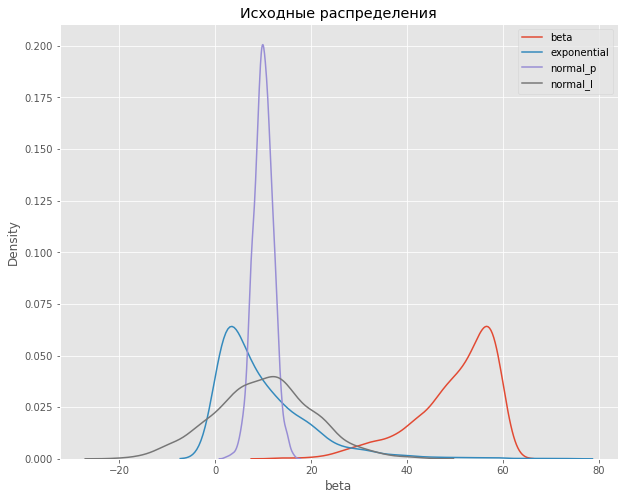

In [63]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [64]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


## MinMaxScaler

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:

    Из каждого значения признака х вычитается минимальное значение этого признака:  (x-min)
    Результат вычитания делится на разность между максимумом и минимумом признака: (max-min)


$x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}$



,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


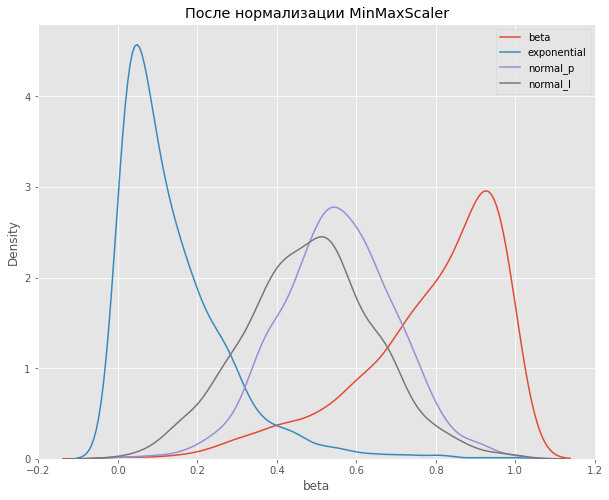

In [70]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_mm['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_mm['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_mm['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

df_mm.describe()

## RobustScaler

Нормализация методом RobustScaler происходит в несколько этапов:

    из каждого значения признака вычитается медиана признака: \(x - медиана\)
    полученное значение делится на межквартильный размах: \(значение\ 75\% — значение\ 25\%\)

$x_{scaled} = \frac{(x - x_{median})}{IQR}$

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


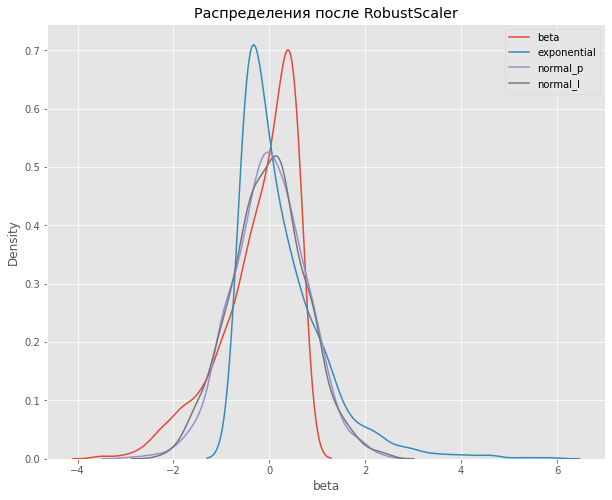

In [71]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_r['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_r['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_r['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

df_r.describe()

## Стандартизация 

Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

$X_{scaled} = \frac{(x — x_{mean})}{x_{std}},$

где $x_{std}$ — стандартное отклонение.

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


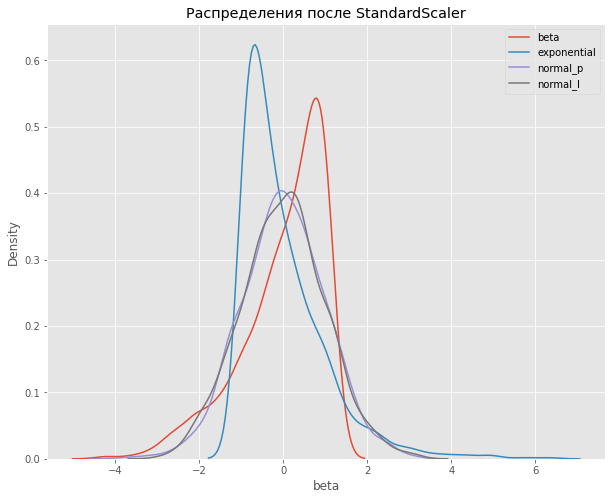

In [72]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1, label ='beta')
sns.kdeplot(df_s['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df_s['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df_s['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

df_s.describe()

## Wineset:

,points,price,price_round,year_corrected,year,is_usa,is_fr,is_it,old_wine,area,years_diff
count,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,1.298350e+05,129941.000000
mean,88.447142,35.363256,35.338104,2010.767011,2011.089004,0.419352,0.169983,0.150340,0.306081,4.398653e+06,4175.633949
std,3.039719,39.576943,39.577050,3.595492,54.759578,0.493455,0.375619,0.357406,0.460866,4.377311e+06,2241.238827
min,80.000000,4.000000,4.000000,1934.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,2.586000e+03,1837.000000
25%,86.000000,18.000000,18.000000,2009.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,3.570220e+05,3298.000000
50%,88.000000,28.000000,28.000000,2012.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,7.569500e+05,3664.000000
75%,91.000000,40.000000,40.000000,2013.000000,2013.000000,1.000000,0.000000,0.000000,1.000000,9.372610e+06,4759.000000
max,100.000000,3300.000000,3300.000000,2017.000000,7200.000000,1.000000,1.000000,1.000000,1.000000,9.984670e+06,98627.000000


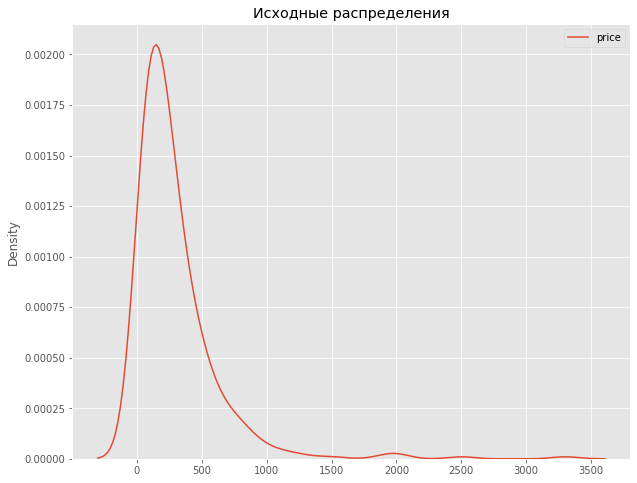

In [75]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(wine_data['price'].unique(), ax=ax1, label ='price')
plt.legend()
wine_data.describe()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,year,year_date,is_usa,is_fr,is_it,old_wine,locality,population,area,years_diff
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.334700,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,2013,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,-0.590909,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,2011,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,-0.636364,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,2013,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,-0.681818,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,2013,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,1.681818,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,2012,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,0.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,2013,2013-01-01,0,0,0,0,Erben Müller-Burggraef) 2013 Brauneberger Juff...,"83,129,285",357022.0,3298.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,2.136364,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,2004,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,0.090909,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,2013,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,0.181818,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,2012,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0


,points,price,price_round,year_corrected,year,is_usa,is_fr,is_it,old_wine,area,years_diff
count,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,1.298350e+05,129941.000000
mean,88.447142,0.334693,35.338104,2010.767011,2011.089004,0.419352,0.169983,0.150340,0.306081,4.398653e+06,4175.633949
std,3.039719,1.798952,39.577050,3.595492,54.759578,0.493455,0.375619,0.357406,0.460866,4.377311e+06,2241.238827
min,80.000000,-1.090909,4.000000,1934.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,2.586000e+03,1837.000000
25%,86.000000,-0.454545,18.000000,2009.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,3.570220e+05,3298.000000
50%,88.000000,0.000000,28.000000,2012.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,7.569500e+05,3664.000000
75%,91.000000,0.545455,40.000000,2013.000000,2013.000000,1.000000,0.000000,0.000000,1.000000,9.372610e+06,4759.000000
max,100.000000,148.727273,3300.000000,2017.000000,7200.000000,1.000000,1.000000,1.000000,1.000000,9.984670e+06,98627.000000


43500.77493697044


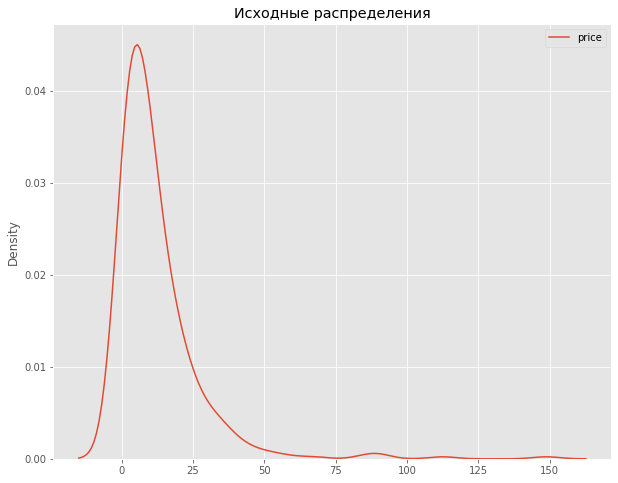

In [279]:
# инициализируем нормализатор MinMaxScaler
#r_scaler = preprocessing.MinMaxScaler()
r_scaler = preprocessing.RobustScaler()


# кодируем исходный датасет
wine_data_r = wine_data.copy()

#wine_data_r['price'] = r_scaler.fit_transform(wine_data_r['price'].reset_index())[:,1]
wine_data_r['price'] = r_scaler.fit_transform(wine_data_r[['price']])
display(wine_data_r)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
#wine_data_sns = pd.DataFrame(wine_data_r['price'], columns='price')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')
# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(wine_data_r['price'].unique(), ax=ax1, label ='price')
plt.legend()

display(wine_data_r.describe())

print(wine_data_r['price'].sum())

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,year,year_date,is_usa,is_fr,is_it,old_wine,locality,population,area,years_diff
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.000003,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,2013,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,-0.514525,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,2011,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,-0.539793,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,2013,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,-0.565060,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,2013,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,0.748842,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,2012,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,-0.186050,Mosel,unknown,Anna Lee C. Iijima,unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,...,2013,2013-01-01,0,0,0,0,Erben Müller-Burggraef) 2013 Brauneberger Juff...,"83,129,285",357022.0,3298.0
129967,US,Citation is given as much as a decade of bottl...,unknown,90,1.001515,Oregon,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),...,2004,2004-01-01,1,0,0,1,Oregon,"333,022,386",9372610.0,6586.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,-0.135515,Alsace,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,...,2013,2013-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3298.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,-0.084981,Alsace,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),...,2012,2012-01-01,0,1,0,0,Alsace,"68,035,000",547030.0,3664.0


,points,price,price_round,year_corrected,year,is_usa,is_fr,is_it,old_wine,area,years_diff
count,129972.000000,1.299720e+05,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,129972.000000,1.298350e+05,129941.000000
mean,88.447142,-9.239046e-18,35.338104,2010.767011,2011.089004,0.419352,0.169983,0.150340,0.306081,4.398653e+06,4175.633949
std,3.039719,1.000004e+00,39.577050,3.595492,54.759578,0.493455,0.375619,0.357406,0.460866,4.377311e+06,2241.238827
min,80.000000,-7.924659e-01,4.000000,1934.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,2.586000e+03,1837.000000
25%,86.000000,-4.387232e-01,18.000000,2009.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,3.570220e+05,3298.000000
50%,88.000000,-1.860498e-01,28.000000,2012.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,7.569500e+05,3664.000000
75%,91.000000,1.171582e-01,40.000000,2013.000000,2013.000000,1.000000,0.000000,0.000000,1.000000,9.372610e+06,4759.000000
max,100.000000,8.248867e+01,3300.000000,2017.000000,7200.000000,1.000000,1.000000,1.000000,1.000000,9.984670e+06,98627.000000


-0.13551516993245472


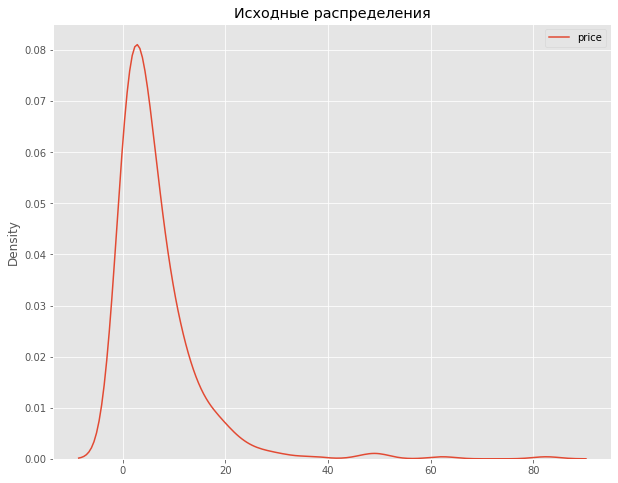

In [275]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
wine_data_s = wine_data.copy()

#wine_data_s['price'] = s_scaler.fit_transform(wine_data_s['price'].reset_index())[:,1]
wine_data_s['price'] = s_scaler.fit_transform(wine_data_s[['price']])

display(wine_data_s)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
#wine_data_s = pd.DataFrame(wine_data_r['price'], columns='price')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')
# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(wine_data_s['price'].unique(), ax=ax1, label ='price')
plt.legend()

display(wine_data_s.describe())

print(wine_data_s['price'][129968])

In [102]:
wine_data_s['price'].reset_index()

,index,price
0,0,0.000003
1,1,-0.514525
2,2,-0.539793
3,3,-0.565060
4,4,0.748842
...,...,...
129967,129966,-0.186050
129968,129967,1.001515
129969,129968,-0.135515
129970,129969,-0.084981


## EDA3 7. Отбор признаков. Мультиколлинеарность

In [107]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot: >

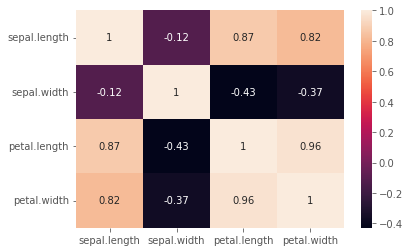

In [108]:
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [109]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


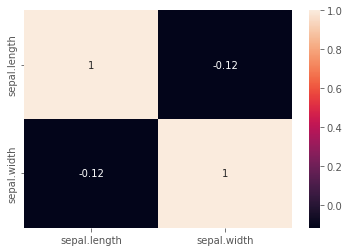

In [111]:
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов
iris.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),...,0,0,0,0,1,0,0,0,0,1
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),...,0,0,0,1,0,0,0,0,1,0
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),...,0,0,0,1,1,0,0,0,1,1
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,...,0,0,0,1,1,0,0,1,0,0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,...,0,0,0,1,1,0,0,0,1,1


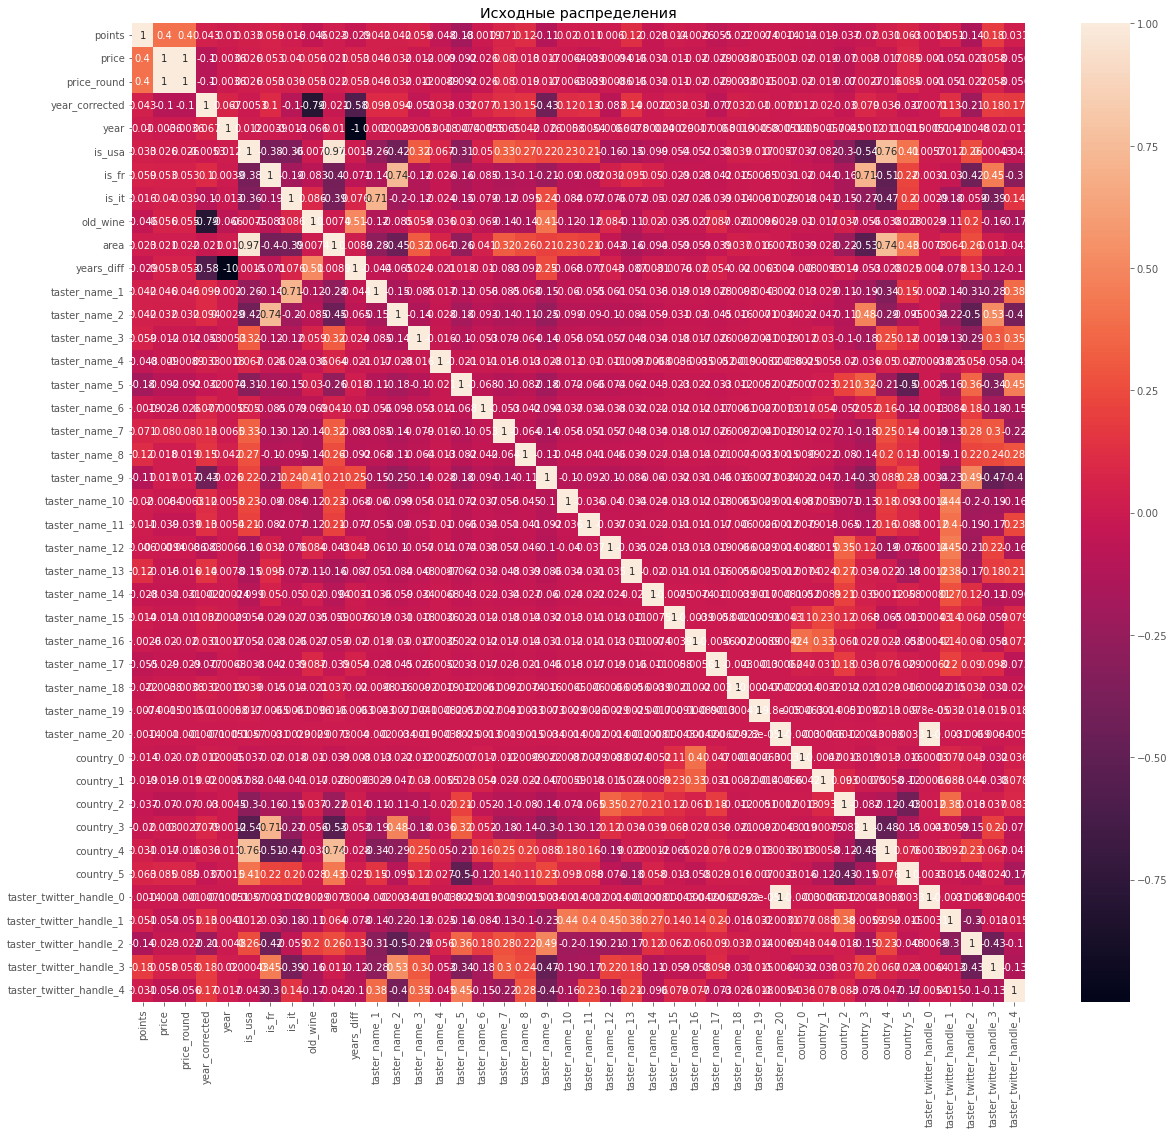

In [117]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 18))
ax1.set_title('Исходные распределения')
sns.heatmap(wine_data_copy.corr(), annot=True) # включаем отображение коэффициентов
wine_data_copy.head()

In [119]:
display(wine_data_copy.corr())
display(wine_data_copy.corr(method = 'spearman'))

,points,price,price_round,year_corrected,year,is_usa,is_fr,is_it,old_wine,area,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
points,1.000000,0.402136,0.402064,0.043098,0.010328,0.032592,0.059248,0.015926,-0.046295,0.023427,...,-0.018852,-0.036594,-0.019548,0.031306,0.062680,-0.001372,0.050516,-0.140644,0.183248,0.030899
price,0.402136,1.000000,0.999997,-0.099900,-0.003627,0.025873,0.053139,0.039566,0.055555,0.021446,...,-0.019101,-0.070159,0.003017,-0.016842,0.085449,-0.001035,-0.051194,-0.022783,0.058051,-0.056477
price_round,0.402064,0.999997,1.000000,-0.099789,-0.003612,0.026379,0.052615,0.039314,0.055453,0.021984,...,-0.019060,-0.070117,0.002713,-0.016389,0.085427,-0.001031,-0.051023,-0.022453,0.057807,-0.056189
year_corrected,0.043098,-0.099900,-0.099789,1.000000,0.067240,-0.005261,0.101375,-0.100171,-0.793540,-0.020922,...,0.019889,-0.030357,0.078689,0.036358,-0.037275,-0.007119,0.130114,-0.205659,0.179778,0.174215
year,0.010328,-0.003627,-0.003612,0.067240,1.000000,0.011945,0.003856,-0.012780,-0.065697,0.010386,...,-0.000569,-0.004536,-0.001236,0.011478,0.001542,-0.000507,0.004106,-0.004787,0.019895,0.016909
is_usa,0.032592,0.025873,0.026379,-0.005261,0.011945,1.000000,-0.384584,-0.357477,-0.007533,0.966549,...,-0.082210,-0.302466,-0.542348,0.757849,0.412552,0.005700,0.012343,0.256748,0.000427,-0.042812
is_fr,0.059248,0.053139,0.052615,0.101375,0.003856,-0.384584,1.000000,-0.190359,-0.082903,-0.398449,...,-0.043777,-0.161066,0.709109,-0.507468,0.219687,-0.003075,-0.030377,-0.424677,0.446008,-0.300874
is_it,0.015926,0.039566,0.039314,-0.100171,-0.012780,-0.357477,-0.190359,1.000000,0.085629,-0.393994,...,-0.040692,-0.149713,-0.268448,-0.471699,0.204202,-0.002858,-0.184386,-0.059161,-0.386531,0.142941
old_wine,-0.046295,0.055555,0.055453,-0.793540,-0.065697,-0.007533,-0.082903,0.085629,1.000000,0.007443,...,-0.016867,0.036848,-0.056298,-0.037832,0.027967,0.002859,-0.106577,0.197093,-0.160151,-0.169606
area,0.023427,0.021446,0.021984,-0.020922,0.010386,0.966549,-0.398449,-0.393994,0.007443,1.000000,...,-0.027564,-0.221510,-0.534342,0.743601,0.434861,0.007288,0.063930,0.255088,0.011283,-0.042326


,points,price,price_round,year_corrected,year,is_usa,is_fr,is_it,old_wine,area,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
points,1.000000,0.581091,0.581807,0.050147,0.050353,0.038396,0.051047,0.008687,-0.048734,0.000869,...,-0.016373,-0.033110,-0.020546,0.039444,0.059013,-0.000961,0.055679,-0.135932,0.181732,0.039665
price,0.581091,1.000000,0.999701,-0.128962,-0.128024,0.149585,0.024843,0.074680,0.068271,0.103591,...,-0.027527,-0.136913,-0.088252,0.055428,0.200683,0.000118,-0.070335,-0.026822,0.104412,-0.069782
price_round,0.581807,0.999701,1.000000,-0.128393,-0.127444,0.153631,0.021540,0.073027,0.067821,0.107376,...,-0.027418,-0.137012,-0.090679,0.058774,0.201328,0.000118,-0.069382,-0.024902,0.103241,-0.068249
year_corrected,0.050147,-0.128962,-0.128393,1.000000,0.997291,-0.009449,0.115289,-0.119600,-0.800174,-0.010435,...,0.021021,-0.019691,0.084698,0.037257,-0.049040,-0.004630,0.158924,-0.224382,0.206084,0.178099
year,0.050353,-0.128024,-0.127444,0.997291,1.000000,-0.008987,0.115940,-0.120974,-0.802457,-0.009537,...,0.020722,-0.019257,0.084940,0.037907,-0.049075,-0.004609,0.158758,-0.224039,0.207370,0.177182
is_usa,0.038396,0.149585,0.153631,-0.009449,-0.008987,1.000000,-0.384584,-0.357477,-0.007533,0.886341,...,-0.082210,-0.302466,-0.542348,0.757849,0.412552,0.005700,0.012343,0.256748,0.000427,-0.042812
is_fr,0.051047,0.024843,0.021540,0.115289,0.115940,-0.384584,1.000000,-0.190359,-0.082903,-0.165827,...,-0.043777,-0.161066,0.709109,-0.507468,0.219687,-0.003075,-0.030377,-0.424677,0.446008,-0.300874
is_it,0.008687,0.074680,0.073027,-0.119600,-0.120974,-0.357477,-0.190359,1.000000,0.085629,-0.501834,...,-0.040692,-0.149713,-0.268448,-0.471699,0.204202,-0.002858,-0.184386,-0.059161,-0.386531,0.142941
old_wine,-0.048734,0.068271,0.067821,-0.800174,-0.802457,-0.007533,-0.082903,0.085629,1.000000,-0.003533,...,-0.016867,0.036848,-0.056298,-0.037832,0.027967,0.002859,-0.106577,0.197093,-0.160151,-0.169606
area,0.000869,0.103591,0.107376,-0.010435,-0.009537,0.886341,-0.165827,-0.501834,-0.003533,1.000000,...,-0.043940,-0.236283,-0.319721,0.612393,0.481969,0.006185,0.011741,0.274920,0.022856,-0.035152


## EDA3 8. Проверка знаний

Датасет содержит следующие признаки:

    age — возраст
    sex — пол (1 - мужчина, 0 - женщина)
    cp — тип боли в груди (4 значения)
    trestbps — артериальное давление в покое
    chol — холестерин сыворотки в мг/дл
    fbs — уровень сахара в крови натощак > 120 мг/дл
    restecg — результаты электрокардиографии в покое (значения 0,1,2)
    thalach — достигнута максимальная частота сердечных сокращений
    exang — стенокардия, вызванная физической нагрузкой
    oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
    slope — наклон пикового сегмента ST при нагрузке
    ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
    thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект


In [210]:
heart = pd.read_csv('data/heart.csv')
heart.head()
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [291]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
display(heart.head(10))
print(heart['old'].sum())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
5,57,1,0,140,192,0,1,148,0,0.4,...,1,1,0,0,0,0,1,0,0,0
6,56,0,1,140,294,0,0,153,0,1.3,...,1,1,0,0,0,0,0,1,0,0
7,44,1,1,120,263,0,1,173,0,0.0,...,0,1,0,0,0,0,0,0,1,0
8,52,1,2,172,199,1,1,162,0,0.5,...,0,1,0,0,0,0,0,0,1,0
9,57,1,2,150,168,0,1,174,0,1.6,...,0,1,0,0,0,0,0,1,0,0


79


In [292]:
trestbps_list = [
    ['0', '20', '123','76', '116' ,'72'],
    ['21', '30', '126', '79', '120', '75'],
    ['31', '40', '129', '81', '127', '80'],
    ['41' ,'50', '135', '83', '137', '84'],
    ['51', '60', '142', '85', '144', '85'],
    ['61', '200', '142', '80','159', '85']
]

trestbps = pd.DataFrame(trestbps_list, columns = ['age_min', 'age_max', 'male_sist', 'male_diast', 'female_sist', 'female_diast'])

for col in trestbps.columns:
    trestbps[col] = trestbps[col].astype('int64')
display(trestbps.info())
display(trestbps)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age_min       6 non-null      int64
 1   age_max       6 non-null      int64
 2   male_sist     6 non-null      int64
 3   male_diast    6 non-null      int64
 4   female_sist   6 non-null      int64
 5   female_diast  6 non-null      int64
dtypes: int64(6)
memory usage: 416.0 bytes


None

,age_min,age_max,male_sist,male_diast,female_sist,female_diast
0,0,20,123,76,116,72
1,21,30,126,79,120,75
2,31,40,129,81,127,80
3,41,50,135,83,137,84
4,51,60,142,85,144,85
5,61,200,142,80,159,85


In [164]:
merged = trestbps[(trestbps['age_max'] >= 63)].merge(
    trestbps[(trestbps['age_min'] < 63)],
    on='age_min')
display(merged.head())

,age_min,age_max_x,male_sist_x,male_diast_x,female_sist_x,female_diast_x,age_max_y,male_sist_y,male_diast_y,female_sist_y,female_diast_y
0,61,200,142,80,159,85,200,142,80,159,85


In [293]:
def mean_pressure(age,sex):
    merged = trestbps[(trestbps['age_max'] > age)].merge(
        trestbps[(trestbps['age_min'] <= age)],
        on='age_min')
  
    if sex == 0:
        return merged['female_sist_x']
    else:
        return merged['male_sist_x']
    
#heart['trestbps_mean'] = heart[heart['sex'] == 1]['age'].apply(mean_pressure, args=(1,))
#heart['trestbps_mean'] = heart[heart['sex'] == 0]['age'].apply(mean_pressure, args=(0,))
heart['trestbps_mean'] = heart.apply(lambda x: mean_pressure(x['age'], x['sex']), axis=1)

display(heart[['age', 'sex', 'trestbps_mean']].head())
print(heart.loc[300] )


,age,sex,trestbps_mean
0,63,1,142.0
1,37,1,129.0
2,41,0,137.0
3,56,1,142.0
4,57,0,144.0


age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
cp_1               0.0
cp_2               0.0
cp_3               0.0
cp_4               1.0
restecg_1          0.0
restecg_2          1.0
restecg_3          0.0
slope_1            0.0
slope_2            0.0
slope_3            1.0
ca_1               0.0
ca_2               1.0
ca_3               0.0
ca_4               0.0
ca_5               0.0
thal_1             0.0
thal_2             0.0
thal_3             1.0
thal_4             0.0
Name: 300, dtype: float64


In [244]:
for col in ['cp', 'restecg', 'slope', 'ca', 'thal' ]:
    display(col, heart[col].unique())

'cp'

array([3, 2, 1, 0], dtype=int64)

'restecg'

array([0, 1, 2], dtype=int64)

'slope'

array([0, 2, 1], dtype=int64)

'ca'

array([0, 2, 1, 3, 4], dtype=int64)

'thal'

array([1, 2, 3, 0], dtype=int64)

In [247]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, type_bin], axis=1)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  193 non-null    float64
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,-0.110236,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,0.157480,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,-0.566929,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,-0.062992,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,1.795276,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,0.015748,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,0.377953,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,-0.740157,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,-1.716535,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,0.098646,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,1.032052,17.538143,0.816232,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,0.000000,94.000000,-1.795276,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,-0.456693,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,0.543307,0.000000,1.000000,166.000000,1.000000,1.600000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,5.102362,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


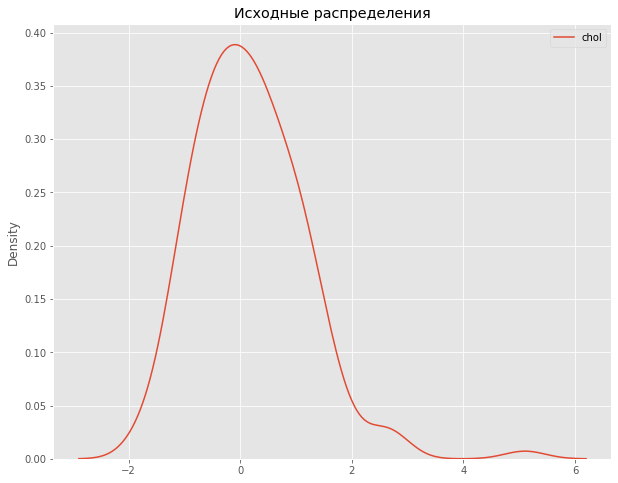

In [249]:
# инициализируем нормализатор MinMaxScaler
#r_scaler = preprocessing.MinMaxScaler()
r_scaler = preprocessing.RobustScaler()


# кодируем исходный датасет
heart_r = heart.copy()

heart_r['chol'] = r_scaler.fit_transform(heart_r['chol'].reset_index())[:,1]
display(heart_r)


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')
# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(heart_r['chol'].unique(), ax=ax1, label ='chol')
plt.legend()

display(heart_r.describe())



<AxesSubplot: title={'center': 'Исходные распределения'}>

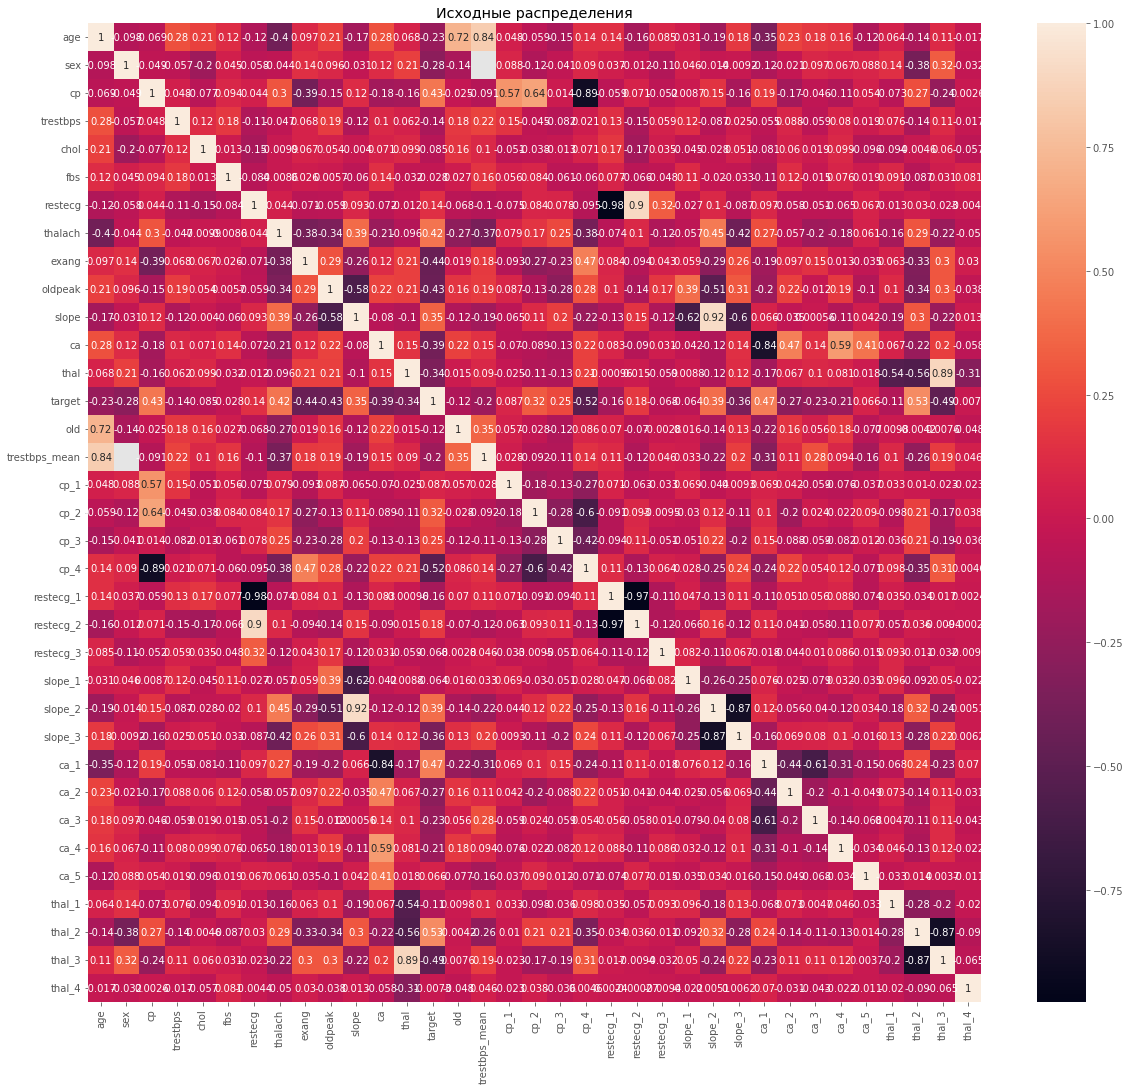

In [250]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 18))
ax1.set_title('Исходные распределения')
sns.heatmap(heart_r.corr(), annot=True) # включаем отображение коэффициентов

In [272]:
display(heart_r.corr()['ca']['ca_1'])

-0.8353587690586364